# Exploring Why Civil Resistance Works

*Assignment 2*  
*Business Analytics Practicum I*  
*Brikena Kokalari P2821811*

## 1. Frequency of Nonviolent and Violent Campaign End Years

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

In [1]:
from pandas.io.stata import StataReader
import math
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_stata('WCRWreplication.dta', convert_dates=True)

In [3]:
df.head()

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.2134,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.0950,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.3868,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0


###  EDA

In [4]:
df.isna().sum()

defect               2
outcome              0
peakmembership      64
eyear                0
byear                0
location             0
campaign             0
target               0
lccode               0
tccode               0
nonviol              0
viol                 0
fselfdet             0
regchange            0
secession            0
other                0
success              0
limited              0
failure              0
ongoing              0
middleeast           0
americas             0
asia                 0
fsu                  0
europe               0
africa               0
lpolity            102
tpolity             54
lgovcap             78
tgovcap             33
                  ... 
growthrgdppc       175
lupop              110
recur5              99
recur10            100
polityt10          108
polityt1            62
polityt5            76
politychanget10    115
politychanget1      64
politychanget5      92
politychanget0     114
authdum              1
deltatgovca

In [5]:
df.shape #323 rows and 85 columns

(323, 85)

Let's check for Na values and if viol and nonviol coloumns are different in each row

In [6]:
print("Total number of Na Values of column 'viol': %d" % df['viol'].isnull().sum())
print("Total number of Na Values of column 'nonviol': %d" % df['nonviol'].isnull().sum())

Total number of Na Values of column 'viol': 0
Total number of Na Values of column 'nonviol': 0


In [7]:
df['test'] = np.where(df['viol']==df['nonviol'], 
                                           'yes', 'no')
filtered_data = df[df["test"]== 'no']
filtered_data.shape #323 rows again. No problem with the columns

(323, 86)

In [8]:
#round down to the nearest 10 to find the decade each end year belongs to
filtered_data['decade'] = filtered_data['eyear'].apply(lambda x: int(round(x // 10)) * 10)

In [9]:
df1 = filtered_data[['viol','decade']]
df1.head()

,viol,decade
0,1,1950
1,1,1920
2,0,1980
3,1,1920
4,1,1960


In [10]:
df2 = df1.groupby(['viol','decade']).size().reset_index()
df2.columns = ['viol', 'decade', 'number_of_nonviolent_campaigns']
df2.head()

,viol,decade,number_of_nonviolent_campaigns
0,0,1910,1
1,0,1920,1
2,0,1930,1
3,0,1940,5
4,0,1950,9


Pandas has a built-in implementation of Matplotlib that we can use. Plotting in pandas is as simple as appending a .plot() method to a series or dataframe. With a little modification to the code, we can visualize this plot as a cumulative plot, also know as a Stacked Line Plot or Area Plot. 

In [11]:
# we are using the inline backend
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


Text(0, 0.5, 'Campaigns')

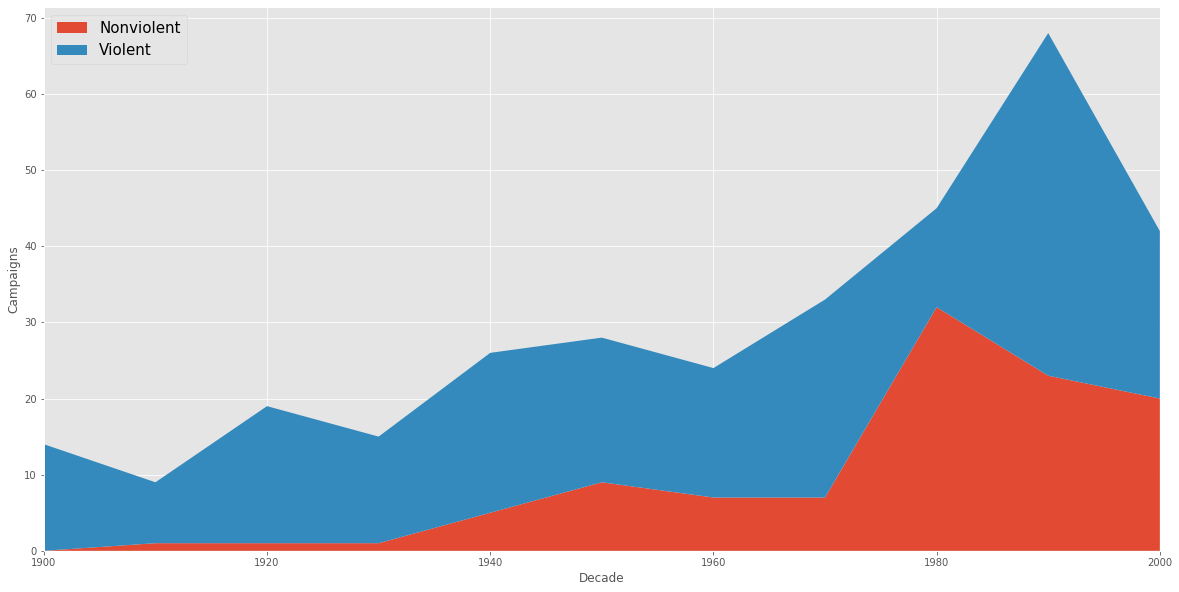

In [12]:
pivot= pd.pivot_table(df2, index=['viol'],
                               columns=['decade'],
                               values='number_of_nonviolent_campaigns', 
                               fill_value=0)
lb = ['Nonviolent', 'Violent']
plt.figure(figsize=(20,10))
plt.stackplot(pivot.columns, pivot.values, labels = lb)
ax = plt.gca()
plt.legend(loc='upper left',  fontsize=15)
plt.xlim(1900, 2000)
plt.xlabel('Decade')
plt.ylabel('Campaigns')

In [13]:
violent = df2.loc[df2.viol == 1]
nonviolent = df2.loc[df2.viol == 0]
violent.head()

,viol,decade,number_of_nonviolent_campaigns
10,1,1900,14
11,1,1910,8
12,1,1920,18
13,1,1930,14
14,1,1940,21


In [14]:
nonviolent.head()

,viol,decade,number_of_nonviolent_campaigns
0,0,1910,1
1,0,1920,1
2,0,1930,1
3,0,1940,5
4,0,1950,9


Stackplots are generated by plotting different datasets vertically on top of one another rather than overlapping with one another. So if we want to show nonviolent campaigns (y1) on top of violent ones, we can define first the violent campaigns running the following code.

(1900, 2000)

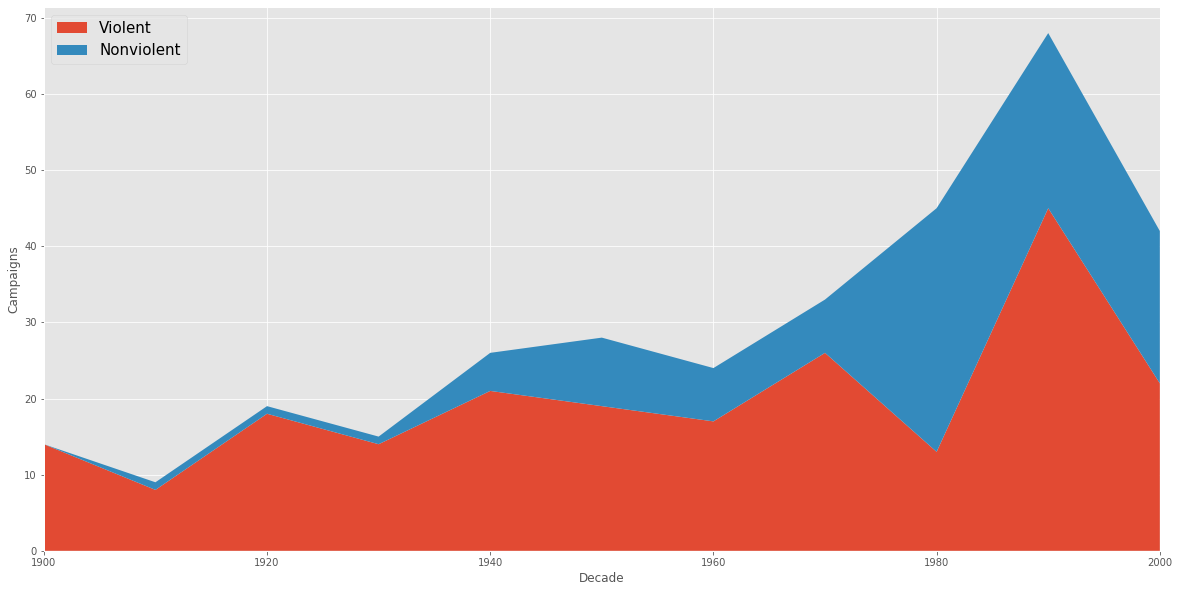

In [15]:
## Basic stacked area chart.
x=violent['decade']
y1=violent.number_of_nonviolent_campaigns.values
y2= np.insert(nonviolent.number_of_nonviolent_campaigns.values,0,0) #insert values for decade 1900
labels=['Violent', 'Nonviolent']
plt.figure(figsize=(20,10))
plt.stackplot(x, y1, y2, labels=labels)
plt.legend(loc='upper left',  fontsize=15)
plt.xlabel('Decade')
plt.ylabel('Campaigns')
plt.xlim(1900, 2000)

## 2: Number of Nonviolent Campaigns and Percentage of Success

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success.

In [16]:
nonviolent = df2.loc[df2.viol == 0]
nonviolent=nonviolent.sort_values('decade', ascending=True)
nv=nonviolent.loc[3:]
nv.reset_index(inplace=True)
nv

,index,viol,decade,number_of_nonviolent_campaigns
0,3,0,1940,5
1,4,0,1950,9
2,5,0,1960,7
3,6,0,1970,7
4,7,0,1980,32
5,8,0,1990,23
6,9,0,2000,20


Successfull is a non violent campaign with a outcome 5.

In [17]:
df3=filtered_data.loc[np.logical_and(filtered_data.nonviol == 1, filtered_data.outcome == 5)]

In [18]:
#group by decade and count
df3=df3.groupby('decade').agg({'decade': [ 'size']}).reset_index()
df3.columns = ['decade', 'success_number_of_nonviolent_campaigns']
df3

,decade,success_number_of_nonviolent_campaigns
0,1920,1
1,1930,1
2,1940,2
3,1950,3
4,1960,3
5,1970,4
6,1980,17
7,1990,12
8,2000,14


We can caluclate the percentage of success from the formula : the Number of Successful Non Violent Campaigns devided by the Total Number of Non Violent Campaigns

In [19]:
df3=df3.loc[2:]
df3.reset_index(inplace=True)
df3['percentage_successes'] = df3.success_number_of_nonviolent_campaigns / nv.number_of_nonviolent_campaigns
df3=np.round(df3, decimals=2)
df3

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,decade,success_number_of_nonviolent_campaigns,percentage_successes
0,2,1940,2,0.40
1,3,1950,3,0.33
2,4,1960,3,0.43
3,5,1970,4,0.57
4,6,1980,17,0.53
5,7,1990,12,0.52
6,8,2000,14,0.70


In [20]:
df4 = df3[['decade','percentage_successes']]
df4.set_index('decade', inplace=True)
df4

,percentage_successes
decade,
1940,0.40
1950,0.33
1960,0.43
1970,0.57
1980,0.53
1990,0.52
2000,0.70


In [21]:
df5 = nv[['decade', 'number_of_nonviolent_campaigns']]
df5.set_index('decade', inplace=True)
df5

,number_of_nonviolent_campaigns
decade,
1940,5
1950,9
1960,7
1970,7
1980,32
1990,23
2000,20


In [22]:
#merge the dataframes
data=pd.merge(df4, df5, on='decade')
data

,percentage_successes,number_of_nonviolent_campaigns
decade,,
1940,0.40,5
1950,0.33,9
1960,0.43,7
1970,0.57,7
1980,0.53,32
1990,0.52,23
2000,0.70,20


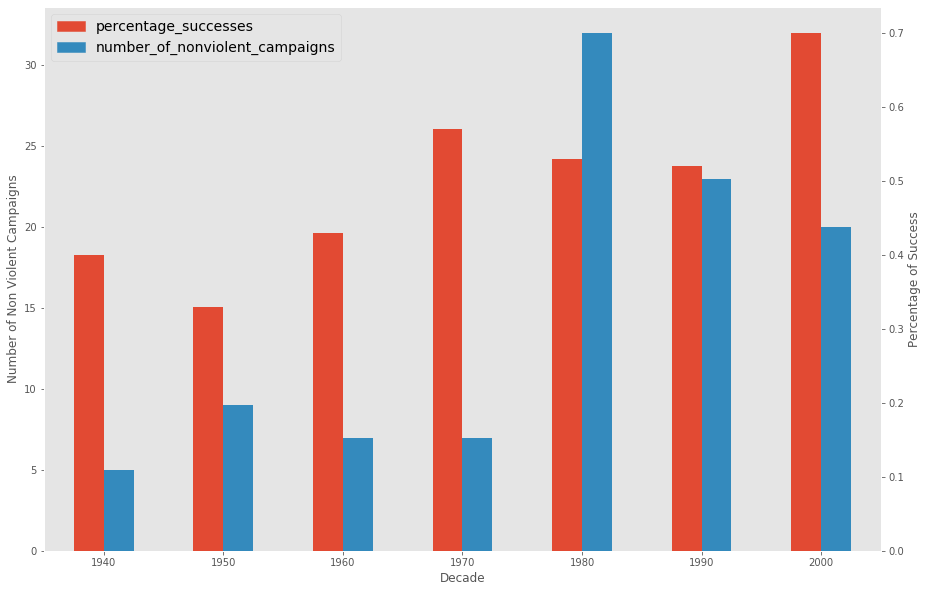

In [23]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[15,10])
data.plot(kind='bar', secondary_y=['percentage_successes'], legend=False,  rot= 0, ax=ax)
ax.set_ylabel('Number of Non Violent Campaigns')
ax.right_ax.set_ylabel('Percentage of Success')
plt.grid(False)
ax.set_xlabel('Decade')
L = [mpatches.Patch(color=g, label=col) 
     for col,g in zip(data.columns, plt.rcParams['axes.prop_cycle'].by_key()['color'])]

plt.legend(handles=L, loc=0,fontsize=14)
plt.show()

## 3: Success Rate by Decade

Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like this, showing that nonviolent campaigns have higher success probabilities:


In [24]:
df6=filtered_data.loc[np.logical_and(filtered_data.viol == 1, filtered_data.outcome == 5)]

In [25]:
df6=df6.groupby('decade').agg({'decade': [ 'size']}).reset_index()
df6

decade     
          size
0    1900    1
1    1910    2
2    1920    2
3    1930    2
4    1940    7
5    1950    7
6    1960    4
7    1970   10
8    1980    5
9    1990   12
10   2000    3

In [26]:
df6.columns = ['decade', 'viol_sum_per_decade']
df6

,decade,viol_sum_per_decade
0,1900,1
1,1910,2
2,1920,2
3,1930,2
4,1940,7
5,1950,7
6,1960,4
7,1970,10
8,1980,5
9,1990,12


In [27]:
df6=df6.loc[4:]
df6

,decade,viol_sum_per_decade
4,1940,7
5,1950,7
6,1960,4
7,1970,10
8,1980,5
9,1990,12
10,2000,3


In [28]:
df6.set_index('decade', inplace=True)

In [29]:
df6

,viol_sum_per_decade
decade,
1940,7
1950,7
1960,4
1970,10
1980,5
1990,12
2000,3


In [30]:
violent = df2.loc[df2.viol == 1]
violent.set_index('decade', inplace=True)
violent.columns = ['VIOL', 'number_of_violent_campaigns']
violent=violent.sort_values('decade', ascending=True)
violent

,VIOL,number_of_violent_campaigns
decade,,
1900,1,14
1910,1,8
1920,1,18
1930,1,14
1940,1,21
1950,1,19
1960,1,17
1970,1,26
1980,1,13


In [31]:
v=violent.loc[4:]
v

,VIOL,number_of_violent_campaigns
decade,,
1900,1,14
1910,1,8
1920,1,18
1930,1,14
1940,1,21
1950,1,19
1960,1,17
1970,1,26
1980,1,13


In [32]:
df6['viol_percentage_successes'] = df6.viol_sum_per_decade / v.number_of_violent_campaigns
df6=np.round(df6, decimals=2)
df6

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,viol_sum_per_decade,viol_percentage_successes
decade,,
1940,7,0.33
1950,7,0.37
1960,4,0.24
1970,10,0.38
1980,5,0.38
1990,12,0.27
2000,3,0.14


In [33]:
df7 = pd.merge(df4, df6, on='decade')
df7

,percentage_successes,viol_sum_per_decade,viol_percentage_successes
decade,,,
1940,0.40,7,0.33
1950,0.33,7,0.37
1960,0.43,4,0.24
1970,0.57,10,0.38
1980,0.53,5,0.38
1990,0.52,12,0.27
2000,0.70,3,0.14


From the below bar chart we can see that non violent campaigns (red bars) have higher success probabilities than violent ones (blue bars)

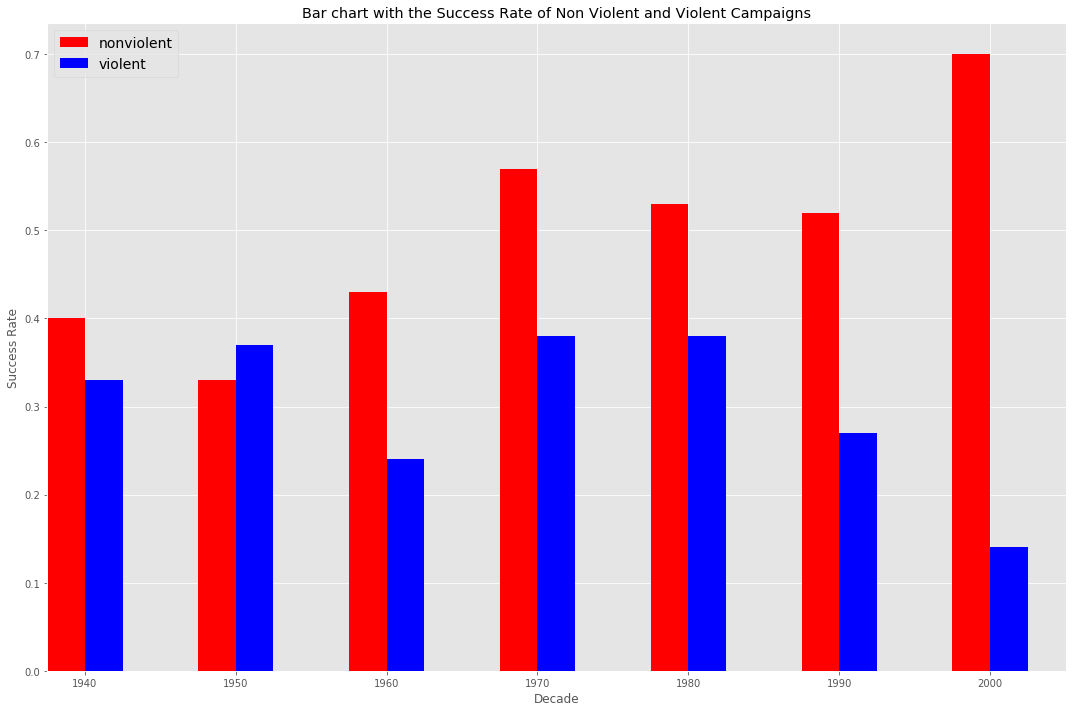

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,10]) # Create matplotlib figure
ax1 = fig.add_subplot(111)
width=0.25
df4['percentage_successes'].plot( kind='bar', color='red', ax=ax1, width=width, position=1, rot=0, label='nonviolent')
df6['viol_percentage_successes'].plot( kind='bar', color='blue', ax=ax1, width=width, position=0, rot=0, label= 'violent')
ax1.set_ylabel('Success Rate')
ax1.set_xlabel('Decade')
ax1.set_title('Bar chart with the Success Rate of Non Violent and Violent Campaigns')
ax1.legend(fontsize=14)
fig.tight_layout()
plt.show()

## 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

In [35]:
df8 = filtered_data.sort_values(by='peakmembership', ascending=False)
df8 = df8.head(25)                             
df8 = df8.loc[:, ['peakmembership', 'byear', 'eyear', 'location', 'target', 'viol', 'success']]
df8.columns = ['Peak Membership', 'Start Year', 'End Year', 'Location', 'Target', 'Violent', 'Successful'] 
df8['Violent'] = df8['Violent'].replace({1: 'Yes', 0: 'No'})
df8['Successful'] = df8['Successful'].replace({1: 'Yes', 0: 'No'})

Let's seerch if Greece is in the top 25 largest resistance campaigns, with the highest memership.

In [36]:
df8[df8['Location'].str.contains("Greece")]

,Peak Membership,Start Year,End Year,Location,Target,Violent,Successful
92,500000.0,1963,1963,Greece,Karamanlis regime,No,Yes



In 1955, Karamanlis founded a new party, the National Radical Union (EPE), and remained in power for eight years, until 1963. During this period, economic growth was rapid and major agricultural works were carried out to improve the road network, tourism and industries. In 1955-63 Greece had the fastest growth rate of all European countries, with the exception of West Germany. In May 1963, a state-run organization, without the government's direct or indirect involvement, assassinated the assembly man, Gregory Lambrakis in Thessaloniki. The political system seemed incapable of reform: a Karamanlis proposal to revise the Constitution in 1963 did not succeed, since the Prime Minister was forced to resign by King Paul in June of that year.
http://www.presidency.gr/constantinos-karamanlis/

## 5. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.


Most of the data that we come across has missing data. We’ll check for missing data, also visualize them to get a better idea and remove them.

In [37]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



It is always a good practice to play around with the data and fully exploit the visualization libraries to have fun with the data.

In [38]:
df9 = filtered_data[['success', 'mempc', 'lnpop']]

This is a count plot that shows the number of Campaigns who were successful which is our target variable.

In [39]:
count_fail = len(df9[df9['success']==0])
count_success = len(df9[df9['success']==1])
pct_fail = count_fail/(count_fail+count_success)
print("percentage of fail is", round(pct_fail*100,2))
pct_success = count_success/(count_fail+count_success)
print("percentage of success is", round(pct_success*100,2))
df9['success'].value_counts()

percentage of fail is 65.33
percentage of success is 34.67


0    211
1    112
Name: success, dtype: int64

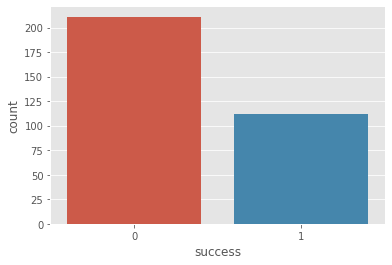

In [40]:
sns.countplot(x='success',data=df9)

Our classes are imbalanced, and the ratio of fail to success instances is 65:35.

Since there are a lot of data, we use the seaborn library to visualize the null values. In that case, our task becomes much easier.

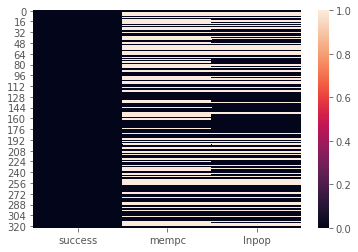

In [41]:
sns.heatmap(df9.isnull())

In [42]:
percent_missing = df9.isnull().sum() * 100 / len(df9)
percent_missing

success     0.000000
mempc      49.535604
lnpop      36.532508
dtype: float64

In [43]:
df9 = df9.dropna(how='any',axis=0) 


Now we can run logistic regression on the data. The dependent variable will be the 'success' column .

In [44]:
success_model = logit("success ~ mempc + lnpop", df9).fit()
success_model.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2020-02-19 23:49 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

### Interpretation

* One unit increase in Membership per capita brings an increase of 4.4892 in the log odds of successful campaign; equivalently, the odds ratio increases by $e^{4.4892}\approx 89.05$ or about 88%. Membership per capita here is the Log of peakmembership devided by Location’s logged population the year the campaign ends, logged (lmembers/lnpop), so a unit increase has a great impact on the outcome of the campaign. 

* One unit increase in Location’s population the year the campaign ends (logged ),brings an increase of 0.0907 in the log odds of successful campaign; equivalently, the odds ratio increases by $e^{0.0907}\approx 1.09$ or about 9%.

* The intercept is the log odds of having an successful campaign when all the independent variables are held at zero; that is $e^{-5.8199}\approx 0.0029$. That means that $p/(1−p)=0.0029$, or $p=0$.

We can also confirm this interpretation by looking at the predicted values using the estimated coefficients, i.e. the equation:

\begin{equation*}
logit(p) =\frac{p}{(1+p)}=-5.8199+4.4892*mempc+0.0907*nlpop
\end{equation*}

In [45]:
#make predictions
pred = success_model.predict(df9)

In [46]:
b=df9.mempc

Text(0.5, 1.0, 'Logistic Regression Model')

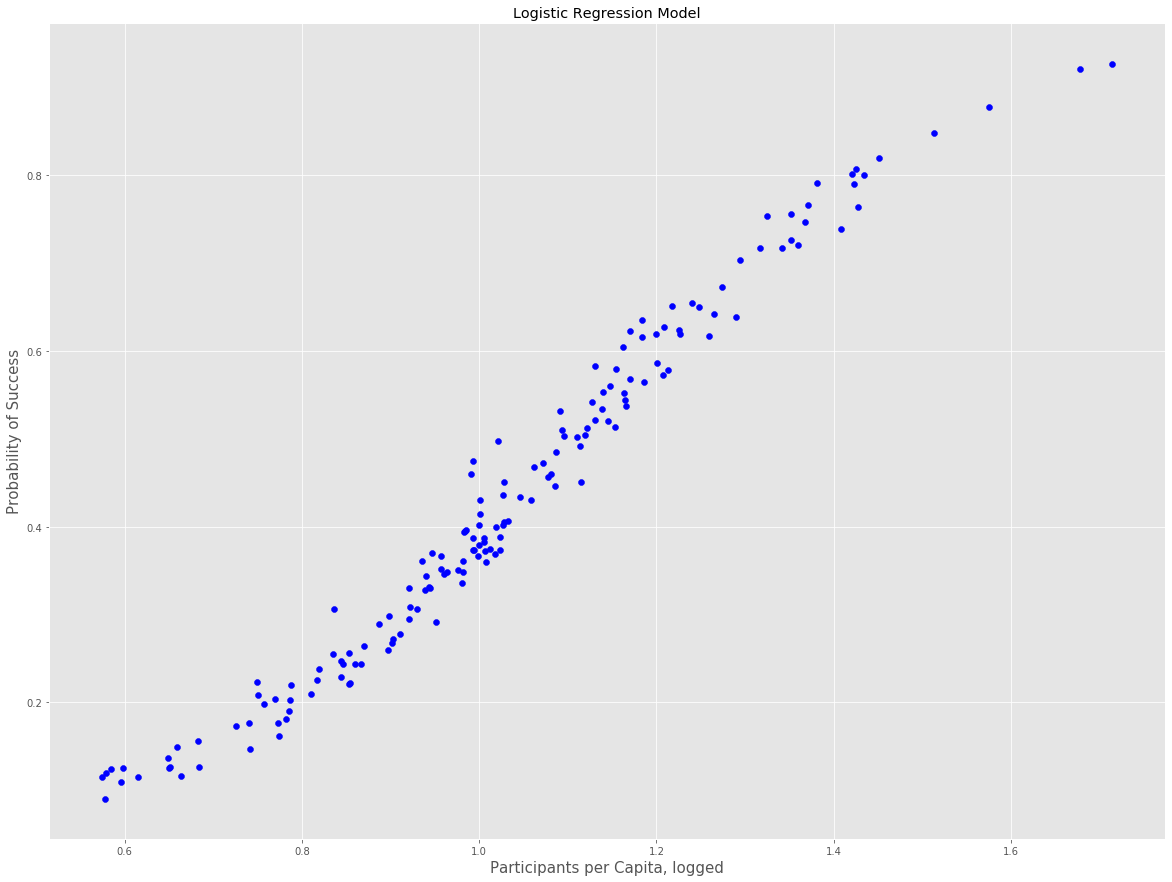

In [47]:
plt.figure(figsize=[20,15])
plt.scatter(b,pred, color='blue')
plt.ylabel('Probability of Success', fontsize=15)
plt.xlabel('Participants per Capita, logged', fontsize=15)
plt.title("Logistic Regression Model")

## 6. The Level of Participation Tipping Point

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

Let's plot the classes and see how are the data distributed

Text(0.5, 0, 'Membership per capita (lmembers/lnpop)')

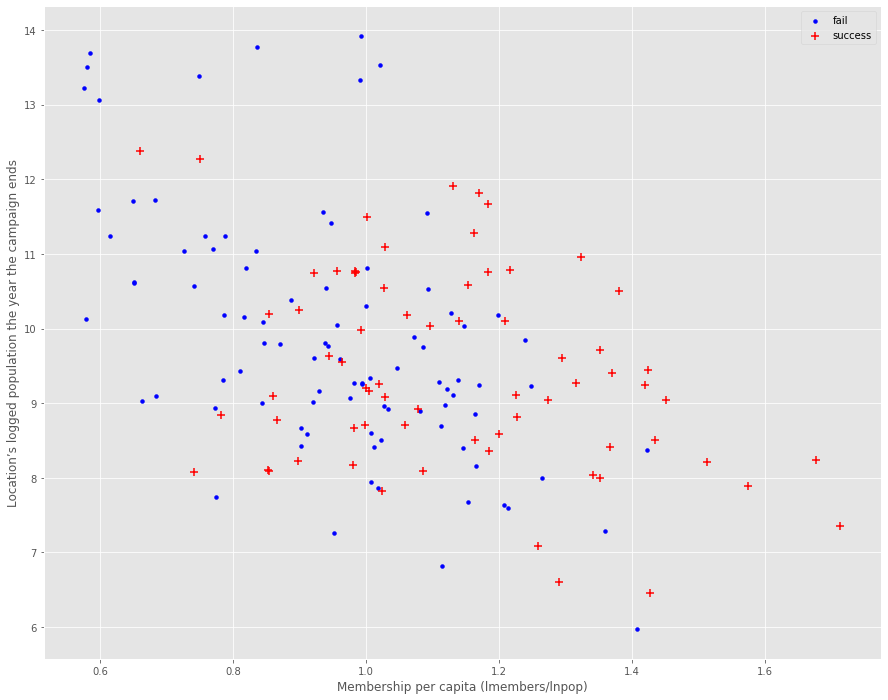

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[15,12])
ax1 = fig.add_subplot(111)
ax1.scatter(df9.mempc[df9.success==0],df9.lnpop[df9.success==0], s=15, c='b', marker="o", label='fail')
ax1.scatter(df9.mempc[df9.success==1],df9.lnpop[df9.success==1], s=50, c='r', marker="+", label='success')
plt.legend(loc='upper right');
ax1.set_ylabel('Location’s logged population the year the campaign ends')
ax1.set_xlabel('Membership per capita (lmembers/lnpop)')


As tipping point, we consider the crucial point beyond which we consider we would have greater chances for a successful outcome of a campaign. To solve this one we can use Logistic regression on machine learning.
Logistic regression is a linear model for classification rather than regression. We can consider this problem as a classification model and try to find the optimal threshold or decision boundary. We use  **sklearn**,(formerly scikits.learn and also known as sklearn) , which is a free software machine learning library for the Python programming language, featuring various as classification, regression and clustering algorithms. *We are going to find the optimal threshold for imbalanced data.* There are many techniques that may be used to address an imbalanced classification problem, such as resampling the training dataset and developing customized version of machine learning algorithm. However, in this problem we are using the approach of changing the decision threshold.

In [49]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [50]:
# Add prediction to dataframe
df9['pred'] = success_model.predict(df9)

Let's plot the ROC CURVE

In [51]:
fpr, tpr, thresholds =roc_curve(df9['success'], df9['pred'])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.722734


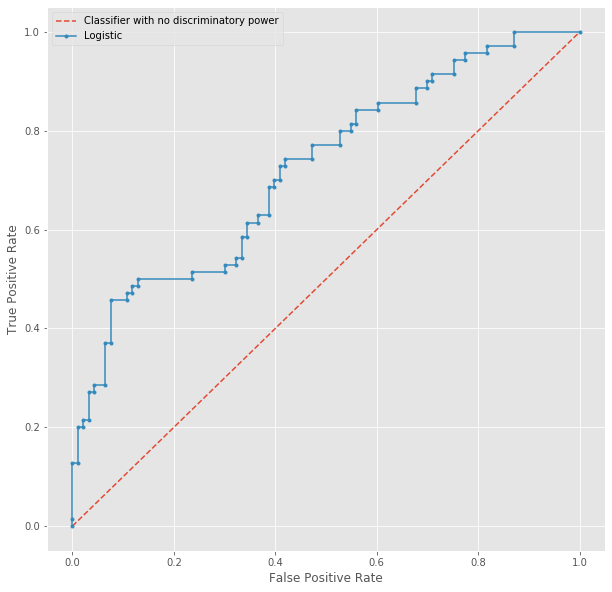

In [52]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
#plot the roc curve for the model
plt.figure(figsize=(10,10))
pyplot.plot([0,1], [0,1], linestyle='--', label='Classifier with no discriminatory power')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Optimal Threshold for ROC Curve

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

 - Sensitivity = TruePositive / (TruePositive + FalseNegative)
 - Specificity = TrueNegative / (FalsePositive + TrueNegative)
 
Where:

 - Sensitivity = True Positive Rate
 - Specificity = 1 – False Positive Rate
 
#### The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

 - G-Mean = sqrt(Sensitivity * Specificity)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Threshold=0.409702, G-Mean=0.664
42


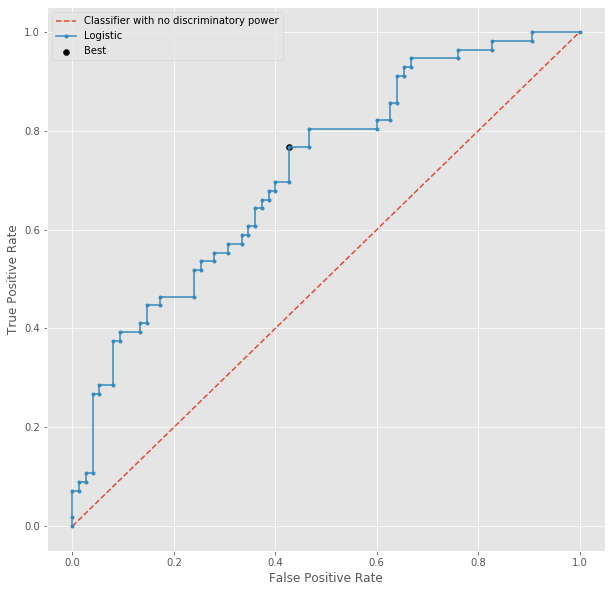

In [53]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate dataset
X = df9[['mempc' , 'lnpop']]
y = df9[['success']]
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print(ix)
# plot the roc curve for the model
plt.figure(figsize=(10,10))
pyplot.plot([0,1], [0,1], linestyle='--', label='Classifier with no discriminatory power')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [54]:
#Best Threshold=0.359979
y0 = 0.409702 # y coordinate
import scipy.interpolate
prs = scipy.interpolate.interp1d(pred,b)
x0=prs(0.409702)
print(x0)

1.021827170102071


The threshold of 0.409702 is interpolating x axis at point $x0 \approx 1.0218$ . So mempership per capita (mempc) = 1.0218.  Membership per capita (mempc) is equal with the division of logged membership(lmembers) by logged population (lnpop). After all the mathematical operations, the percentage of memperships per population required for a campaign in order to be successful is: $population^{threshold-1}$ 

 $population^{threshold-1}$ =  $population^{1,0218-1}$ =  $population^{0,0218}$ 

It turns out there is a much faster way to get the same result, called the Youden’s J statistic.

The statistic is calculated as:

- J = Sensitivity + Specificity – 1 

Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:

- J = Sensitivity + (1 – FalsePositiveRate) – 1 

Which we can restate as:

- J = TruePositiveRate – FalsePositiveRate 

#### We can then choose the threshold with the largest J statistic value.

Best Threshold=0.409702


c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


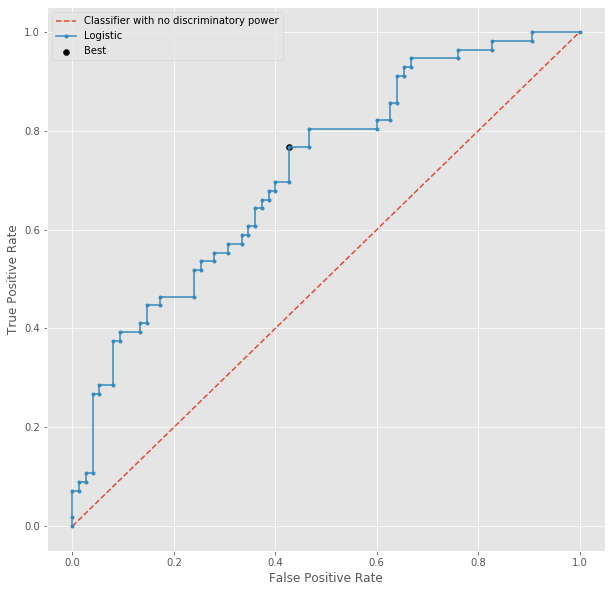

In [55]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate dataset
X = df9[['mempc' , 'lnpop']]
y = df9[['success']]
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# get the best threshold
J = (np.abs(tpr - fpr))
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
# plot the roc curve for the model
plt.figure(figsize=(10,10))
pyplot.plot([0,1], [0,1], linestyle='--', label='Classifier with no discriminatory power')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [56]:
#Best Threshold=0.359979
y0 = 0.409702 # y coordinate
import scipy.interpolate
prs = scipy.interpolate.interp1d(pred,b)
x0=prs(0.409702)
print(x0)

1.021827170102071


Making a function to check the above code

In [57]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]
# Find optimal probability threshold
thre = cutoff_youdens_j(fpr,tpr,thresholds)
print (thre)

0.4097015485114116


### Optimal Threshold Tuning

* Wishing to know the best threshold directly.
In this case, we can define a set of thresholds and then evaluate predicted probabilities under each in order to find and select the optimal threshold.
First, we can fit a logistic regression model on our synthetic classification problem, then predict class labels and evaluate them using the F-Measure, which is the harmonic mean of precision and recall. This will use the default threshold of 0.5 when interpreting the probabilities predicted by the logistic regression model.



In [58]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
X = df9[['mempc' , 'lnpop']]
y = df9[['success']]
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Instead of predicting class labels directly, we can predict probabilities.

In [59]:
# predict probabilities
yhat = model.predict_proba(testX)

We only require the probabilities for the positive class.

In [60]:
# keep probabilities for the positive outcome only 
probs = yhat[:, 1]

Next, we can then define a set of thresholds to evaluate the probabilities. In this case, we will test all thresholds between 0.0 and 1.0 with a step size of 0.001, that is, we will test 0.0, 0.001, 0.002, 0.003, and so on to 0.999.

In [61]:
# define thresholds
thresholds = arange(0, 1, 0.001)

We can then call this function for each threshold and evaluate the resulting labels using the f1_score().

In [62]:
# evaluate each threshold
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


We now have an array of scores that evaluate each threshold in our array of thresholds. All we need to do now is locate the array index that has the largest score (best F-Measure) and we will have the optimal threshold and its evaluation.

In [63]:
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.378, F-Score=0.66667


In [64]:
thresholds[ix]

0.378

In [65]:
#Best Threshold=0.359979
y0 = 0.378 # y coordinate
import scipy.interpolate
prs = scipy.interpolate.interp1d(pred,b)
x0=prs(0.378)
print(x0)

1.002262172486658


The threshold of 0.378 is interpolating x axis at point $x0 \approx 1.00226$ . So mempership per capita (mempc) = 1.00226.  Membership per capita (mempc) is equal with the division of logged membership(lmembers) by logged population (lnpop). After all the mathematical operations, the percentage of memperships per population required for a campaign in order to be successful is: $population^{threshold-1}$ 

 $population^{threshold-1}$ =  $population^{1,00226-1}$ =  $population^{0,00226}$ 

Text(0.5, 1.0, 'Logistic Regression Model')

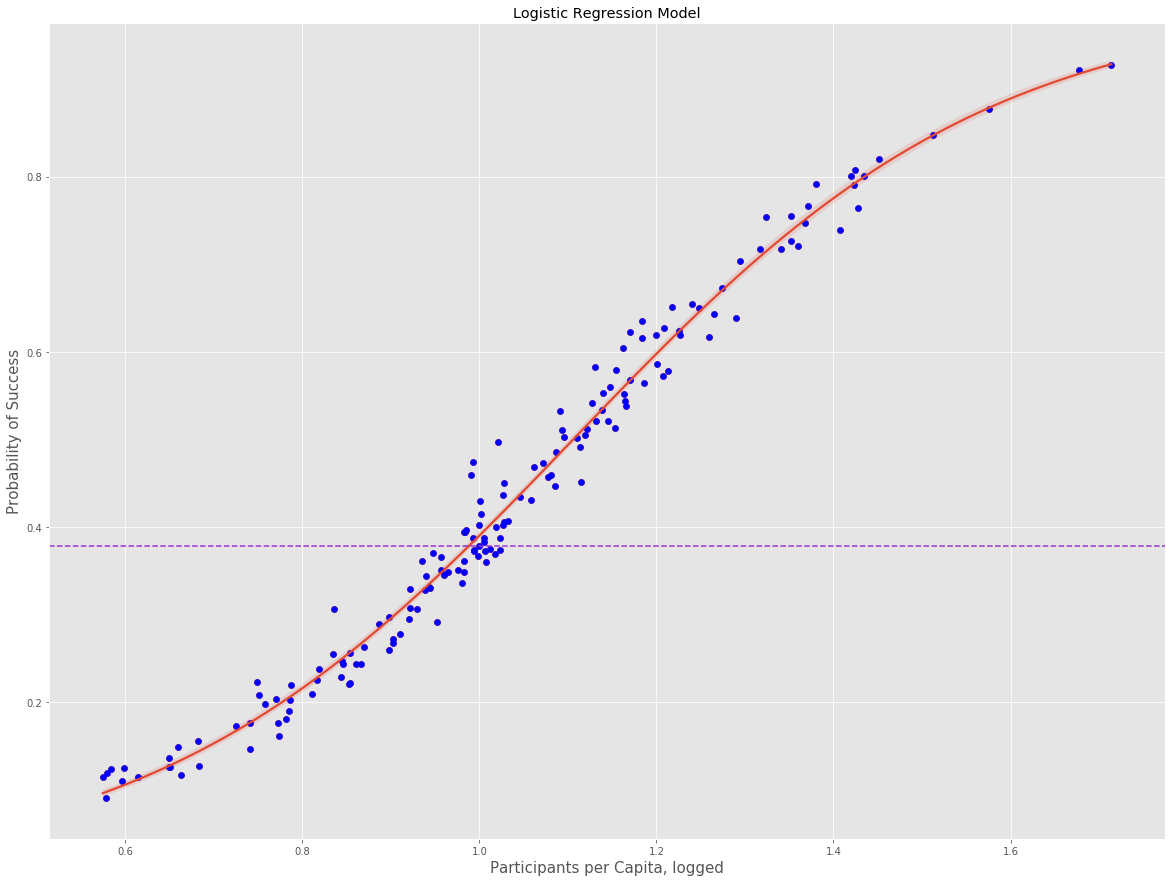

In [66]:
import seaborn as sns
plt.figure(figsize=[20,15])
sns.regplot(b, pred, data=df9, logistic=True)
plt.scatter(b,pred, color='blue')
pyplot.axhline(y=thresholds[ix], color='darkorchid', linestyle='--')
plt.ylabel('Probability of Success', fontsize=15)
plt.xlabel('Participants per Capita, logged', fontsize=15)
plt.title("Logistic Regression Model")

We can also calculate the percentage for considering a successful campaign using the default threshold of 0.5 when interpreting the probabilities predicted by the logistic regression model.

In [67]:
#Default threshold
y0 = 0.5 # y coordinate
import scipy.interpolate
prs = scipy.interpolate.interp1d(pred,b)
x0=prs(0.5)
print(x0)

1.071010036540379


The threshold of 0.5 is interpolating x axis at point $x0 \approx 1.0701$ . So mempership per capita (mempc) = 1.0701.  Membership per capita (mempc) is equal with the division of logged membership(lmembers) by logged population (lnpop). After all the mathematical operations, the percentage of memperships per population required for a campaign in order to be successful is: $population^{threshold-1}$ 



 $population^{threshold-1}$ =  $population^{1,0701-1}$ =  $population^{0,0701}$ 

## 7. Nonviolent Resistance, Target Regime Type, Geographical Location

1. Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the POLITY IV score of campaign target (`tpolity`), the log of peakmembership, and the location’s logged population the year the campaign ends.

In [68]:
df10 = filtered_data[['success','nonviol','tpolity','lmembers','lnpop']]

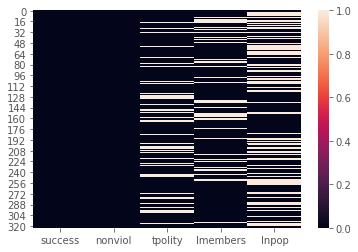

In [69]:
sns.heatmap(df10.isnull())

In [70]:
percent_missing = df10.isnull().sum() * 100 / len(df9)
percent_missing

success      0.000000
nonviol      0.000000
tpolity     33.128834
lmembers    39.263804
lnpop       72.392638
dtype: float64

df10 = df10.dropna(how='any',axis=0) 
df10.head()

In [71]:
reg_model = logit("success ~ nonviol + tpolity + lmembers + lnpop ", df10).fit()

reg_model.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2020-02-19 23:50 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
=================================================================

"""

 * The coefficient for nonviol= 0.9048 which corresponds to the log of odds ratio between the violent and non violent campaign. The odds ratio equals 2.4714 which means the odds for non violent campaign are about 147% higher than the odds for males. Nonviol is a binary categorical variable so the odds ratio is interpreding by changing the categories. The output indicates that being the campaign violent or not isassociated with the probability of being  successful. (p value = 0.0510, Wald test).

2. Examine whether nonviolent resistance remains significant even if we control for geographical location of the compaign.

In [72]:
df11 = filtered_data[['success','nonviol','middleeast',
 'americas',
 'asia',
 'fsu',
 'europe',
 'africa']]

In [73]:
df11.head()

,success,nonviol,middleeast,americas,asia,fsu,europe,africa
0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,1,1,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


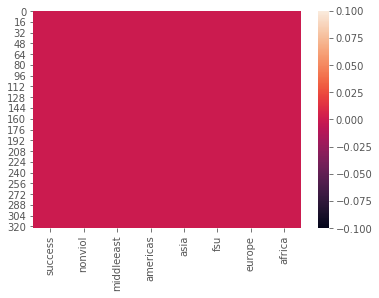

In [74]:
sns.heatmap(df11.isnull())# no missing values

In [75]:
percent_missing = df11.isnull().sum() * 100 / len(df9)
percent_missing

success       0.0
nonviol       0.0
middleeast    0.0
americas      0.0
asia          0.0
fsu           0.0
europe        0.0
africa        0.0
dtype: float64

In [76]:
df11['sum'] = df11.iloc[:, 2:].sum(axis=1) #sum all col of the location to check if there are any mistakes

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
df11['sum'].unique() #check if  sum is 1 in each row

array([1], dtype=int64)

In [78]:
del df11['sum']#delete the column 'sum'

Below we run the model to check if nonviolent resistance remains significant even if we control for geographical location of the compaign. We have selected n-1 location to put in the model (as dummy variables) because the reggression models consider the last location as the last remaining of a multi class catigorical variable.

In [79]:
#run the model
loc_model = logit("success ~ nonviol  + americas + asia + fsu + europe+ africa ", df11).fit()

loc_model.summary2()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: success          AIC:              396.2465  
Date:               2020-02-19 23:50 BIC:              422.6901  
No. Observations:   323              Log-Likelihood:   -191.12   
Df Model:           6                LL-Null:          -208.47   
Df Residuals:       316              LLR p-value:      4.9505e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.7374    0.4299  -4.0416  0.0001  -2.5800  -0.8949
nonviol        1.2582    0.2648   4.7515  0.0000   0.7392   1.7771
americas       1.0604    0.5178   2.0479  0.0406   0.0456   2.0753
asia           0.2612    0.5054   0.5168  0.6053  -0.7294   1.2517
fsu            0.7645    0.6279   1.2176  0.2234  -0.4661   1.9951
europe         0.4650    0.5402   0.8609  0.3893  -0.5936   1.5237
africa         1.0235    0.4847   2.1116  0.0347   0.0735   1.9736
=================================================================

"""

 * The coefficient for nonviol= 1.2582 which corresponds to the log of odds ratio between the violent and non violent campaign. The odds ratio equals 3.5191 which means the odds for non violent campaign are about 252% higher than the odds for males.Nonviol is a binary categorical variable so the odds ratio is interpreding by changing the categories. The output indicates that being the campaign violent or not is significantly associated with the probability of being  successful. (p value = 0.0000, Wald test).
 
 * Even if we take into consideration the geografical location, the outcome does not change a lot. So it does remain significant even if we control the geografical location.